In [4]:
%matplotlib inline
import itertools
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from climatools.fortran.read import numbers

from IPython import display

In [5]:
def s_pref():
    '''
    Reference pressures used for the k-table in RRTMG
    '''
    return '''
      pref(:) = (/                                                                       
     &     1.05363e+03,8.62642e+02,7.06272e+02,5.78246e+02,                              
     &     4.73428e+02,                                                                  
     &     3.87610e+02,3.17348e+02,2.59823e+02,2.12725e+02,                              
     &     1.74164e+02,                                                                  
     &     1.42594e+02,1.16746e+02,9.55835e+01,7.82571e+01,                              
     &     6.40715e+01,                                                                  
     &     5.24573e+01,4.29484e+01,3.51632e+01,2.87892e+01,                              
     &     2.35706e+01,                                                                  
     &     1.92980e+01,1.57998e+01,1.29358e+01,1.05910e+01,                              
     &     8.67114e+00,                                                                  
     &     7.09933e+00,5.81244e+00,4.75882e+00,3.89619e+00,                              
     &     3.18993e+00,                                                                  
     &     2.61170e+00,2.13828e+00,1.75067e+00,1.43333e+00,                              
     &     1.17351e+00,                                                                  
     &     9.60789e-01,7.86628e-01,6.44036e-01,5.27292e-01,                              
     &     4.31710e-01,                                                                  
     &     3.53455e-01,2.89384e-01,2.36928e-01,1.93980e-01,                              
     &     1.58817e-01,                                                                  
     &     1.30029e-01,1.06458e-01,8.71608e-02,7.13612e-02,                              
     &     5.84256e-02,                                                                  
     &     4.78349e-02,3.91639e-02,3.20647e-02,2.62523e-02,                              
     &     2.14936e-02,                                                                  
     &     1.75975e-02,1.44076e-02,1.17959e-02,9.65769e-03/)

'''


def s_preflog():
    '''
    Log of reference pressures used for k-table in RRTMG.
    '''
    return '''
       preflog(:) = (/                                                                    
     &     6.9600e+00, 6.7600e+00, 6.5600e+00, 6.3600e+00,                               
     &     6.1600e+00,                                                                   
     &     5.9600e+00, 5.7600e+00, 5.5600e+00, 5.3600e+00,                               
     &     5.1600e+00,                                                                   
     &     4.9600e+00, 4.7600e+00, 4.5600e+00, 4.3600e+00,                               
     &     4.1600e+00,                                                                   
     &     3.9600e+00, 3.7600e+00, 3.5600e+00, 3.3600e+00,                               
     &     3.1600e+00,                                                                   
     &     2.9600e+00, 2.7600e+00, 2.5600e+00, 2.3600e+00,                               
     &     2.1600e+00,                                                                   
     &     1.9600e+00, 1.7600e+00, 1.5600e+00, 1.3600e+00,                               
     &     1.1600e+00,                                                                   
     &     9.6000e-01, 7.6000e-01, 5.6000e-01, 3.6000e-01,                               
     &     1.6000e-01,                                                                   
     &     -4.0000e-02,-2.4000e-01,-4.4000e-01,-6.4000e-01,                              
     &     -8.4000e-01,                                                                  
     &     -1.0400e+00,-1.2400e+00,-1.4400e+00,-1.6400e+00,                              
     &     -1.8400e+00,                                                                  
     &     -2.0400e+00,-2.2400e+00,-2.4400e+00,-2.6400e+00,                              
     &     -2.8400e+00,                                                                  
     &     -3.0400e+00,-3.2400e+00,-3.4400e+00,-3.6400e+00,                              
     &     -3.8400e+00,                                                                  
     &     -4.0400e+00,-4.2400e+00,-4.4400e+00,-4.6400e+00/)   
    '''


def s_tref():
    '''
    Log of reference temperatures used for the k-table in RRTMG.
    '''
    return '''
      tref(:) = (/                                                                       
     &      2.9420e+02, 2.8799e+02, 2.7894e+02, 2.6925e+02,                              
     &      2.5983e+02,                                                                  
     &      2.5017e+02, 2.4077e+02, 2.3179e+02, 2.2306e+02,                              
     &      2.1578e+02,                                                                  
     &      2.1570e+02, 2.1570e+02, 2.1570e+02, 2.1706e+02,                              
     &      2.1858e+02,                                                                  
     &      2.2018e+02, 2.2174e+02, 2.2328e+02, 2.2479e+02,                              
     &      2.2655e+02,                                                                  
     &      2.2834e+02, 2.3113e+02, 2.3401e+02, 2.3703e+02,                              
     &      2.4022e+02,                                                                  
     &      2.4371e+02, 2.4726e+02, 2.5085e+02, 2.5457e+02,                              
     &      2.5832e+02,                                                                  
     &      2.6216e+02, 2.6606e+02, 2.6999e+02, 2.7340e+02,                              
     &      2.7536e+02,                                                                  
     &      2.7568e+02, 2.7372e+02, 2.7163e+02, 2.6955e+02,                              
     &      2.6593e+02,                                                                  
     &      2.6211e+02, 2.5828e+02, 2.5360e+02, 2.4854e+02,                              
     &      2.4348e+02,                                                                  
     &      2.3809e+02, 2.3206e+02, 2.2603e+02, 2.2000e+02,                              
     &      2.1435e+02,                                                                  
     &      2.0887e+02, 2.0340e+02, 1.9792e+02, 1.9290e+02,                              
     &      1.8809e+02,                                                                  
     &      1.8329e+02, 1.7849e+02, 1.7394e+02, 1.7212e+02/)    
    '''

In [6]:
def s_mls75_pref():
    '''
    Pressures in the mid-latitude atmosphere profile used in CRD.
    '''
    return '''      data (plevel(i),i=1,nlayer+1)/                                                     
     &      0.0000000_r8, 0.0006244_r8, 0.0008759_r8, 0.0012286_r8,                      
     &      0.0017234_r8,                                                                
     &      0.0024174_r8, 0.0033909_r8, 0.0047565_r8, 0.0066720_r8,                      
     &      0.0093589_r8,                                                                
     &      0.0131278_r8, 0.0184145_r8, 0.0258302_r8, 0.0362323_r8,                      
     &      0.0508234_r8,                                                                
     &      0.0712906_r8, 0.1000000_r8, 0.1402710_r8, 0.1967600_r8,                      
     &      0.2759970_r8,                                                                
     &      0.3871_r8, 0.5431_r8, 0.7617_r8, 1.0685_r8, 1.4988_r8,                       
     &      2.1024_r8,                                                                   
     &      2.9490_r8, 4.1366_r8, 5.8025_r8, 8.1392_r8, 11.4170_r8,                      
     &      16.0147_r8,                                                                  
     &      22.4640_r8, 31.5105_r8, 44.2001_r8, 62.0000_r8, 85.7750_r8,                  
     &      109.5500_r8,                                                                 
     &      133.3250_r8, 157.1000_r8, 180.8750_r8, 204.6500_r8,                          
     &      228.4250_r8, 252.2000_r8,                                                    
     &      275.9750_r8, 299.7500_r8, 323.5250_r8, 347.3000_r8,                          
     &      371.0750_r8, 394.8500_r8,                                                    
     &      418.6250_r8, 442.4000_r8, 466.1750_r8, 489.9500_r8,                          
     &      513.7250_r8, 537.5000_r8,                                                    
     &      561.2750_r8, 585.0500_r8, 608.8250_r8, 632.6000_r8,                          
     &      656.3750_r8, 680.1500_r8,                                                    
     &      703.9250_r8, 727.7000_r8, 751.4750_r8, 775.2500_r8,                          
     &      799.0250_r8, 822.8000_r8,                                                    
     &      846.5750_r8, 870.3500_r8, 894.1250_r8, 917.9000_r8,                          
     &      941.6750_r8, 965.4500_r8,                                                    
     &      989.2250_r8, 1013.0000_r8/
 '''


def s_mls75_tref():
    '''
    Temperatures used in the mid-latitude summer profile used in CRD.
    '''
    return '''
      data (tlayer(i),i=1,nlayer)/                                                       
     &      209.9704_r8, 210.2097_r8, 210.7183_r8, 211.2577_r8,                          
     &      211.7986_r8, 212.3405_r8,                                                    
     &      212.8834_r8, 213.4273_r8, 213.9723_r8, 214.5183_r8,                          
     &      215.0652_r8, 215.6132_r8,                                                    
     &      216.1626_r8, 216.7491_r8, 218.4804_r8, 223.1608_r8,                          
     &      229.9159_r8, 237.0121_r8,                                                    
     &      244.3231_r8, 251.8528_r8, 259.6010_r8, 267.5217_r8,                          
     &      273.8894_r8, 274.3845_r8,                                                    
     &      269.4364_r8, 263.1005_r8, 256.6132_r8, 250.3104_r8,                          
     &      244.4832_r8, 239.1006_r8,                                                    
     &      233.8843_r8, 228.8750_r8, 224.8026_r8, 221.8245_r8,                          
     &      219.1726_r8, 216.8415_r8,                                                    
     &      215.7880_r8, 215.7518_r8, 215.7807_r8, 216.4645_r8,                          
     &      219.2781_r8, 223.7674_r8,                                                    
     &      228.2605_r8, 232.4265_r8, 236.2986_r8, 239.9184_r8,                          
     &      243.3190_r8, 246.5257_r8,                                                    
     &      249.5573_r8, 252.4255_r8, 255.1358_r8, 257.6929_r8,                          
     &      260.1064_r8, 262.3929_r8,                                                    
     &      264.5716_r8, 266.6589_r8, 268.6667_r8, 270.6037_r8,                          
     &      272.4764_r8, 274.2898_r8,                                                    
     &      276.0482_r8, 277.7552_r8, 279.4135_r8, 281.0244_r8,                          
     &      282.5865_r8, 284.0929_r8,                                                    
     &      285.5257_r8, 286.8554_r8, 288.0568_r8, 289.1321_r8,                          
     &      290.1115_r8, 291.0293_r8,                                                    
     &      291.9081_r8, 292.7597_r8, 293.5899_r8/    
    '''


In [7]:
def s_saw75_pref():
    '''
    Pressures used in the sub-arctic winter profile used in CRD.
    '''
    return '''
      data (plevel(i), i=1, nlayer + 1)/                                                 
     &    0.0000000,   0.0006244,   0.0008759,   0.0012286,   0.0017234,                 
     &    0.0024174,   0.0033909,   0.0047565,   0.0066720,   0.0093589,                 
     &    0.0131278,   0.0184145,   0.0258302,   0.0362323,   0.0508234,                 
     &    0.0712906,   0.1000000,   0.1402710,   0.1967600,   0.2759970,                 
     &    0.3871,    0.5431,    0.7617,    1.0685,    1.4988,    2.1024,                 
     &    2.9490,    4.1366,    5.8025,    8.1392,   11.4170,   16.0147,                 
     &   22.4640,   31.5105,   44.2001,   62.0000,   85.7750,  109.5500,                 
     &  133.3250,  157.1000,  180.8750,  204.6500,  228.4250,  252.2000,                 
     &  275.9750,  299.7500,  323.5250,  347.3000,  371.0750,  394.8500,                 
     &  418.6250,  442.4000,  466.1750,  489.9500,  513.7250,  537.5000,                 
     &  561.2750,  585.0500,  608.8250,  632.6000,  656.3750,  680.1500,                 
     &  703.9250,  727.7000,  751.4750,  775.2500,  799.0250,  822.8000,                 
     &  846.5750,  870.3500,  894.1250,  917.9000,  941.6750,  965.4500,                 
     &  989.2250, 1013.0000/    
    '''


def s_saw75_tref():
    '''
    Temperatures used in the sub-arctic winter profile used in CRD.
    '''
    return '''
      data (tlayer(i), i = 1, nlayer)/                                                   
     &  211.2100,  212.4826,  215.0756,  217.7324,  220.4205,  223.1399,                 
     &  225.8907,  228.6735,  231.4882,  234.3355,  237.2156,  240.1287,                 
     &  243.0619,  245.6824,  247.7211,  249.4930,  251.2686,  253.0555,                 
     &  254.8535,  256.6617,  258.2965,  257.0200,  251.8593,  245.6121,                 
     &  239.5087,  233.5617,  227.8060,  222.9702,  219.6087,  217.0275,                 
     &  214.7087,  212.7874,  212.2661,  213.2143,  214.4897,  215.7518,                 
     &  216.7051,  217.0524,  217.0658,  217.0659,  217.0659,  217.0659,                 
     &  217.0657,  217.0707,  217.2256,  218.4121,  220.9656,  223.9609,                 
     &  226.8439,  229.5838,  232.1905,  234.6726,  237.0358,  239.2826,                 
     &  241.4128,  243.4232,  245.3092,  247.0656,  248.6884,  250.1771,                 
     &  251.5357,  252.7727,  253.9001,  254.9318,  255.8807,  256.7554,                 
     &  257.5546,  258.2550,  258.7947,  259.0820,  259.0641,  258.7891,                 
     &  258.3628,  257.8709,  257.3581/    
    '''

In [8]:
def s_trp75_pref():
    '''
    Pressures used in the tropicl profile used in CRD.
    '''
    return '''
       data (plevel(i), i = 1, nlayer + 1)/                                              
     &      0.0000000_r8, 0.0006244_r8, 0.0008759_r8, 0.0012286_r8,                      
     &      0.0017234_r8,                                                                
     &      0.0024174_r8, 0.0033909_r8, 0.0047565_r8, 0.0066720_r8,                      
     &      0.0093589_r8,                                                                
     &      0.0131278_r8, 0.0184145_r8, 0.0258302_r8, 0.0362323_r8,                      
     &      0.0508234_r8,                                                                
     &      0.0712906_r8, 0.1000000_r8, 0.1402710_r8, 0.1967600_r8,                      
     &      0.2759970_r8,                                                                
     &      0.3871_r8, 0.5431_r8, 0.7617_r8, 1.0685_r8, 1.4988_r8,                       
     &      2.1024_r8,                                                                   
     &      2.9490_r8, 4.1366_r8, 5.8025_r8, 8.1392_r8, 11.4170_r8,                      
     &      16.0147_r8,                                                                  
     &      22.4640_r8, 31.5105_r8, 44.2001_r8, 62.0000_r8, 85.7750_r8,                  
     &      109.5500_r8,                                                                 
     &      133.3250_r8, 157.1000_r8, 180.8750_r8, 204.6500_r8,                          
     &      228.4250_r8, 252.2000_r8,                                                    
     &      275.9750_r8, 299.7500_r8, 323.5250_r8, 347.3000_r8,                          
     &      371.0750_r8, 394.8500_r8,                                                    
     &      418.6250_r8, 442.4000_r8, 466.1750_r8, 489.9500_r8,                          
     &      513.7250_r8, 537.5000_r8,                                                    
     &      561.2750_r8, 585.0500_r8, 608.8250_r8, 632.6000_r8,                          
     &      656.3750_r8, 680.1500_r8,                                                    
     &      703.9250_r8, 727.7000_r8, 751.4750_r8, 775.2500_r8,                          
     &      799.0250_r8, 822.8000_r8,                                                    
     &      846.5750_r8, 870.3500_r8, 894.1250_r8, 917.9000_r8,                          
     &      941.6750_r8, 965.4500_r8,                                                    
     &      989.2250_r8, 1013.0000_r8/    
    '''


def s_trp75_tref():
    '''
    Temperatures used in the tropical profile used in CRD.
    '''
    return '''
       data (tlayer(i), i = 1, nlayer)/                                                  
     &      210.2409_r8, 210.5239_r8, 211.0985_r8, 211.6824_r8,                          
     &      212.2677_r8, 212.8542_r8,                                                    
     &      213.4418_r8, 214.0308_r8, 214.6209_r8, 215.2122_r8,                          
     &      215.8047_r8, 216.3985_r8,                                                    
     &      216.9957_r8, 217.7589_r8, 220.4488_r8, 225.8594_r8,                          
     &      232.3394_r8, 239.0249_r8,                                                    
     &      245.8975_r8, 252.9619_r8, 260.2183_r8, 266.9444_r8,                          
     &      269.2215_r8, 267.0145_r8,                                                    
     &      263.0619_r8, 257.6949_r8, 252.0602_r8, 246.5490_r8,                          
     &      241.1625_r8, 235.8975_r8,                                                    
     &      230.7513_r8, 225.7210_r8, 220.8037_r8, 215.8554_r8,                          
     &      209.3228_r8, 201.4490_r8,                                                    
     &      196.9717_r8, 200.1833_r8, 207.3744_r8, 213.7087_r8,                          
     &      219.3563_r8, 224.4651_r8,                                                    
     &      229.1386_r8, 233.4520_r8, 237.4624_r8, 241.2137_r8,                          
     &      244.7407_r8, 248.0714_r8,                                                    
     &      251.2287_r8, 254.2318_r8, 257.0965_r8, 259.8364_r8,                          
     &      262.4629_r8, 264.9861_r8,                                                    
     &      267.4148_r8, 269.7563_r8, 272.0171_r8, 274.2024_r8,                          
     &      276.3143_r8, 278.3489_r8,                                                    
     &      280.2858_r8, 282.0777_r8, 283.6658_r8, 285.0422_r8,                          
     &      286.2809_r8, 287.4879_r8,                                                    
     &      288.7410_r8, 290.0624_r8, 291.4273_r8, 292.8017_r8,                          
     &      294.1639_r8, 295.5044_r8,                                                    
     &      296.8197_r8, 298.1095_r8, 299.3740_r8/    
    '''

In [9]:
def fortran2array(s):
    return np.array(numbers(s)).astype(float).reshape(-1, 1)


def into_chunks(l, chunksize):
    return itertools.zip_longest(*(chunksize * [iter(l)]))


def vector_to_F77list(array, num_values_per_line=4):
    '''
    '''
    strfmt = '{:15.6e}_r8'
    
    chunks = into_chunks(array, num_values_per_line)
    
    chunks = list(chunks)
    
    lines = []
    for chunk in chunks[:-1]:
        vs = [strfmt.format(v) for v in chunk if v != None]
        line = ','.join(vs)
        line = line + ','
        lines.append(line)
        
    vs = [strfmt.format(v) for v in chunks[-1] if v != None]
    line = ','.join(vs)
    lines.append(line)    
    return lines


def script():
    d_s = {'pref': s_pref, 'preflog': s_preflog, 'tref': s_tref}
    
    lines = []
    for name, func in d_s.items():
        s = func()
        na = fortran2array(s)
        rna = na[::-1, :]
        
        first_line = '{}(:) = (/'.format(name)
        last_line = '/)'
        lines_name = vector_to_F77list(rna.flatten(), 
                                       num_values_per_line=3)
        lines_name = [first_line] + lines_name + [last_line]
        
        lines_name_amp = []
        lines_name_amp.append(6 * ' ' + lines_name[0])
        for l in lines_name[1:]:
            lines_name_amp.append(5 * ' ' + '&' + l)
        
        lines.extend(lines_name_amp)
    
    fortran = '\n'.join(lines)
    return fortran
        
        
#print(script())

In [10]:
def convert2dataframe(func):
    
    def _func(*args, **kwargs):
        t, p = func(*args, **kwargs)
        t = t[1:]
        p = p[2:]
        p = .5 * (p[1:] + p[:-1])
        plog = np.log(p)
    
        df = pd.DataFrame({'t': t.reshape(-1,),
                           'p': p.reshape(-1,),
                           'logp': plog.reshape(-1,)})

        df = df.set_index(['logp'])
        return df
    return _func


@convert2dataframe
def load_crd_profile(atmpro='mls'):
    '''
    Loads plevel and tlayer from .pro files used in CRD.
    
    Parameters
    ----------
    atmpro: string
        'mls', 'saw', or 'trp'
    t: numpy.array
        layer temperature
    p: numpy.array
        level pressure
    '''
    if atmpro == 'mls':
        tfunc = s_mls75_tref
        pfunc = s_mls75_pref
    elif atmpro == 'saw':
        tfunc = s_saw75_tref
        pfunc = s_saw75_pref
    elif atmpro == 'trp':
        tfunc = s_trp75_tref
        pfunc = s_trp75_pref
        
    t = fortran2array(tfunc())
    p = fortran2array(pfunc())
    return t, p




def dataframe_rrtmg_refatm():
    t = fortran2array(s_tref())
    plog = fortran2array(s_preflog())
    p = fortran2array(s_pref())
    
    df = pd.DataFrame({'t': t.reshape(-1,),
                       'p': p.reshape(-1,),
                       'logp': plog.reshape(-1,)})
    df = df.sort_values('logp')
    df = df.set_index(['logp'])
    return df


def plt_both_profiles():

    df_mls75 = load_crd_profile(atmpro='mls')
    df_saw75 = load_crd_profile(atmpro='saw')
    df_trp75 = load_crd_profile(atmpro='trp')
    df_rrtmg = dataframe_rrtmg_refatm()

    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
    
    ax.plot(df_mls75['t'], df_mls75['p'], 
            linestyle='None', marker='.', color='green', alpha=.6,
            label='mls75.pro')
    ax.plot(df_saw75['t'], df_saw75['p'],
            linestyle='None', marker='.', color='blue', alpha=.6,
            label='saw75.pro')
    ax.plot(df_trp75['t'], df_trp75['p'], 
            linestyle='None', marker='.', color='red', alpha=.6,
            label='trp75.pro')
    
    ax.plot(df_rrtmg['t'], df_rrtmg['p'],
            linestyle='None', marker='.', color='gray',
            label='rrtmg',)
    ax.plot(df_rrtmg['t'] + 30, df_rrtmg['p'],
            color='gray')
    ax.plot(df_rrtmg['t'] - 30, df_rrtmg['p'],
            color='gray')
    
    ax.set_ylabel('pressure (mb)')
    ax.set_xlabel('temperature (K)')
    ax.set_title('atmosphere profiles')
    
    ax.invert_yaxis()
    ax.set_yscale('log')
    ax.grid(b=True)
    ax.legend()
    return fig


def script():
    matplotlib.rcParams.update({'font.size': 13,
                            'grid.color': 'grey',
                            'axes.facecolor': 'white',
                            'axes.edgecolor': 'black',
                            'ytick.direction': 'out',
                            'ytick.major.size': 6, 'ytick.major.width': 1,
                            'ytick.minor.size': 3, 'ytick.minor.width': 1,
                            'xtick.direction': 'out',
                            'xtick.major.size': 6, 'xtick.major.size': 1,
                            'xtick.minor.size': 3, 'xtick.minor.size': 1})     
    
    display.display(display.Markdown('## Atmosphere profiles'))
    fig = plt_both_profiles()
    display.display(fig)
    plt.close()
    
    
    

## Atmosphere profiles

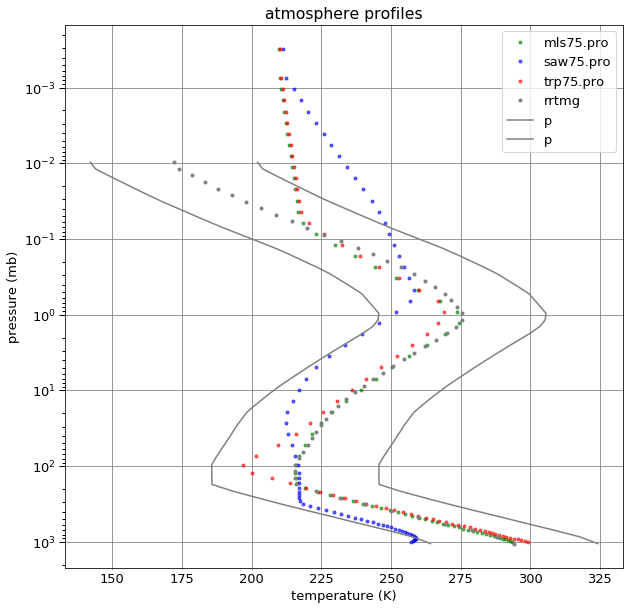

In [11]:
script()

In [12]:
display.HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')